### **Predicting the cost of health insurance for a person**

#### The important insurance company 4Geeks Insurance S.L. wants to calculate, based on physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors and based on data from other companies and a particular study have managed to gather a set of data to train a predictive model.

#### **Step 1:** Load the data

In [1]:
# Import pandas
import pandas as pd

# Read the data from file using read_csv
medical_insurance_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
medical_insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **Step 2:** Exploratory Data Analysis

In [2]:
# Dataframe information
medical_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataframe has 1338 rows and 7 columns. There are:
- Four (4) numerical variables: age, bmi, children, charges
- Three (3) categorical variables: sex, smoker, region
- No missing values
- All the columns are important to predict the charges

In [3]:
# duplicate rows
medical_insurance_df.duplicated().sum()

1

In [4]:
# drop duplicates
medical_insurance_df.drop_duplicates(inplace=True)

In [5]:
# describe dataframe
medical_insurance_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


/tmp/ipykernel_17978/1250625915.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0], data=medical_insurance_df, x='sex', palette=palette)
/tmp/ipykernel_17978/1250625915.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[1], data=medical_insurance_df, x='smoker', palette=palette)
/tmp/ipykernel_17978/1250625915.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[2], data=medical_insurance_df, x='region', palette=palette)


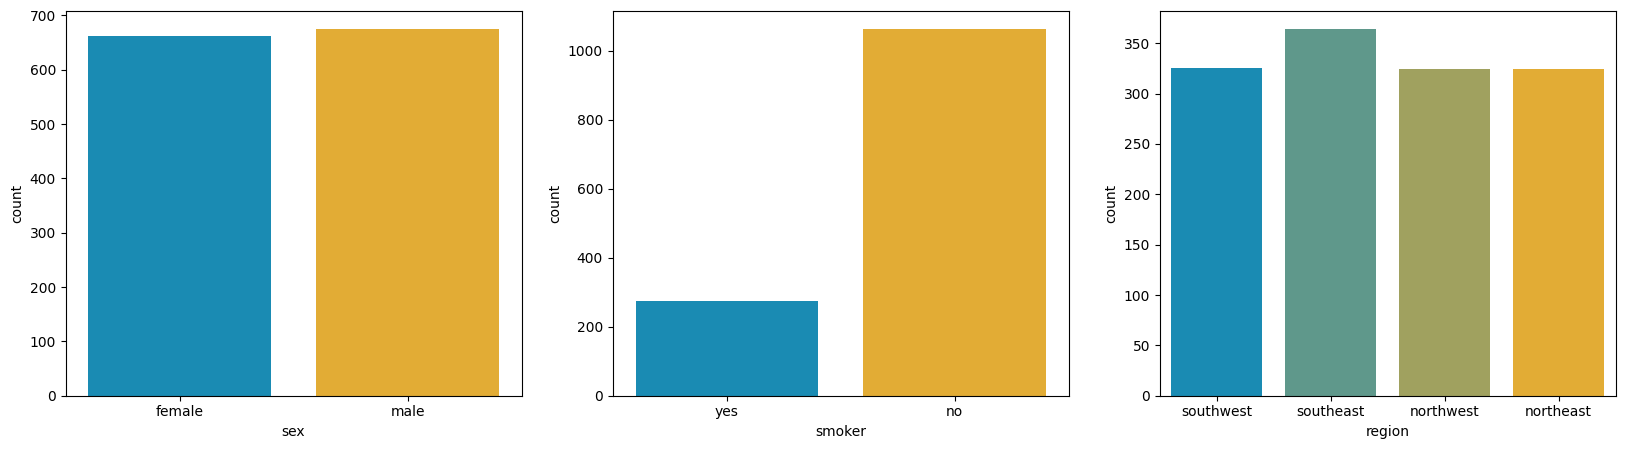

In [6]:
# Visualize the categorical variables with countplot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes objects
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Set the palette colors
palette = "blend:#0097CD,#FFB718"

# Create the countplot for sex
sns.countplot(ax=ax[0], data=medical_insurance_df, x='sex', palette=palette)
# Create the countplot for smoker
sns.countplot(ax=ax[1], data=medical_insurance_df, x='smoker', palette=palette)
# Create the countplot for region
sns.countplot(ax=ax[2], data=medical_insurance_df, x='region', palette=palette)

# Show the plot
plt.show()


We can observe the following:
- The sex of the person is almost equally distributed
- The majority of the people are non-smokers
- People come from 4 different regions, where the majority of them are from the southeast

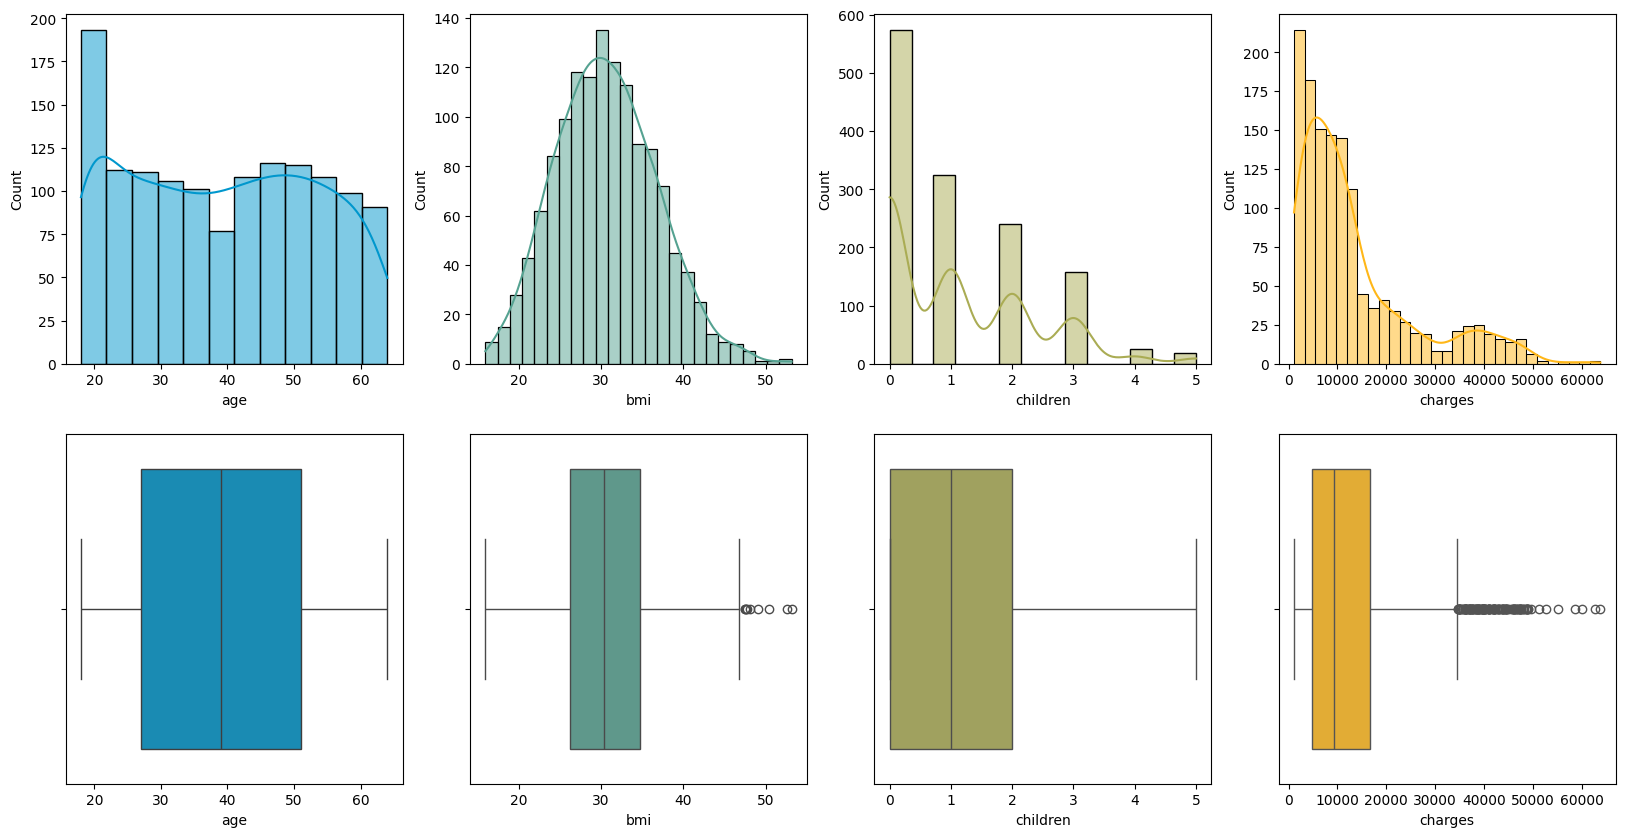

In [7]:
# Visualize the numerical variables with histogram and boxplot
# Create the figure and axes objects
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Set the colors
color = sns.color_palette(palette, 4)
# Create the histogram for age
sns.histplot(ax=ax[0, 0], data=medical_insurance_df, x='age', kde=True, color=color[0])
# Create the boxplot for age
sns.boxplot(ax=ax[1, 0], data=medical_insurance_df, x='age', color=color[0])
# Create the histogram for bmi
sns.histplot(ax=ax[0, 1], data=medical_insurance_df, x='bmi', kde=True, color=color[1])
# Create the boxplot for bmi
sns.boxplot(ax=ax[1, 1], data=medical_insurance_df, x='bmi',color=color[1])
# Create the histogram for children
sns.histplot(ax=ax[0, 2], data=medical_insurance_df, x='children', kde=True, color=color[2])
# Create the boxplot for children
sns.boxplot(ax=ax[1, 2], data=medical_insurance_df, x='children', color=color[2])
# Create the histogram for charges
sns.histplot(ax=ax[0, 3], data=medical_insurance_df, x='charges', kde=True, color=color[3])
# Create the boxplot for charges
sns.boxplot(ax=ax[1, 3], data=medical_insurance_df, x='charges', color=color[3])

# Show the plot
plt.show()


We can see the following:
- The age and the bmi are normally distributed
- The majority of the people have no children
- The charges are right skewed (positive skewness).

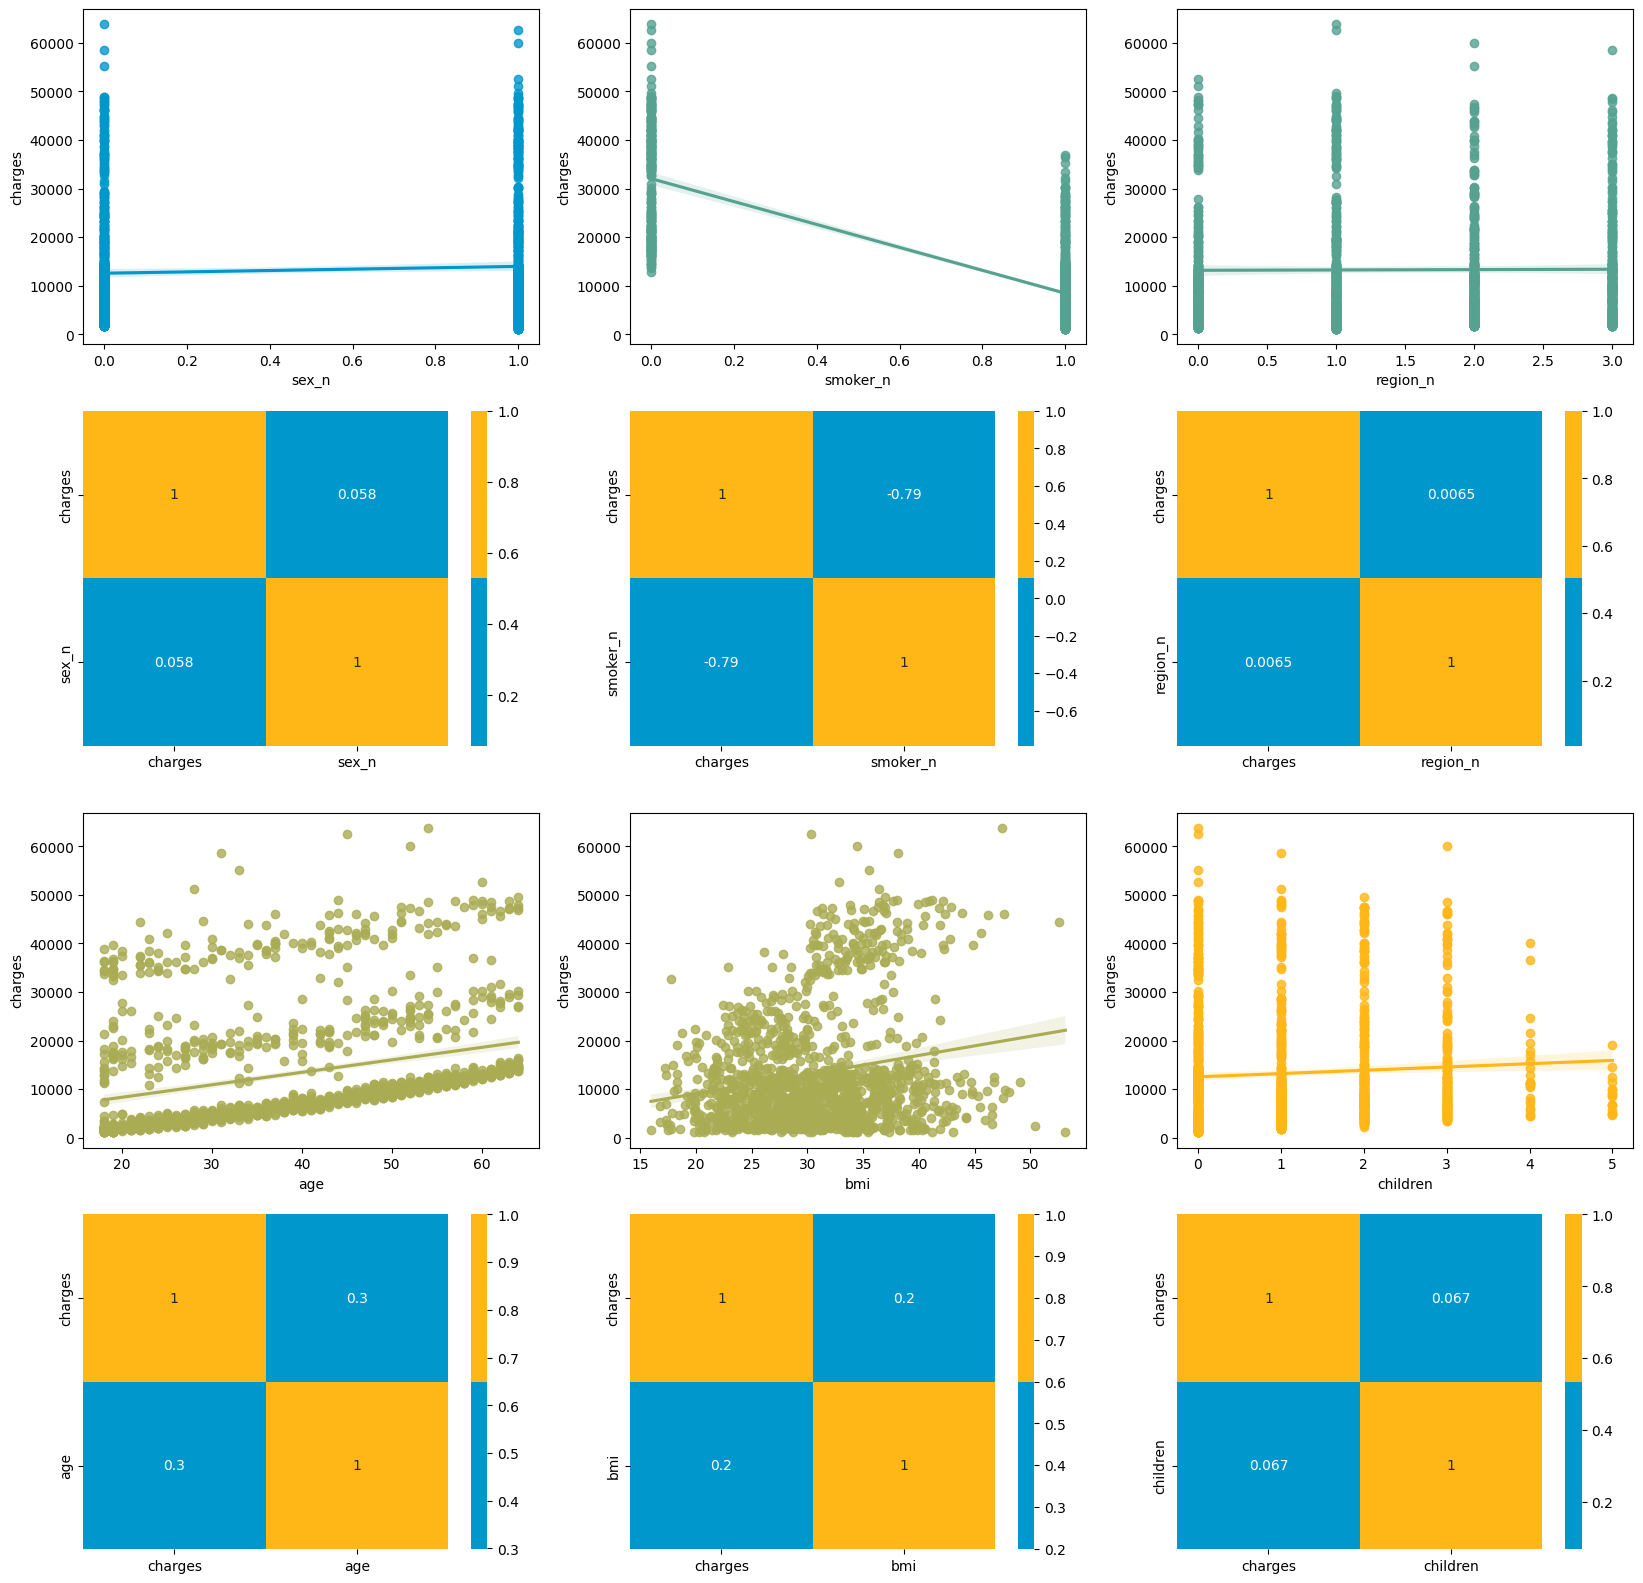

In [16]:
# Multivariate analysis
# Encode the categorical variables to numerical values
medical_insurance_df['sex_n'] = pd.factorize(medical_insurance_df['sex'])[0]
medical_insurance_df['smoker_n'] = pd.factorize(medical_insurance_df['smoker'])[0]
medical_insurance_df['region_n'] = pd.factorize(medical_insurance_df['region'])[0]

# Create a reglot and heatmap to visualize the correlation between variables
# Create the figure and axes objects
fig, ax = plt.subplots(4, 3, figsize=(20, 20))

# Define your custom colors as real numbers (RGB values)
import matplotlib.colors as mcolors
color1 = mcolors.to_rgba("#0097CD")
color2 = mcolors.to_rgba("#FFB718")

# Create a custom colormap using the specified colors
custom_cmap = mcolors.ListedColormap([color1, color2])

# Create the regplot and heatmap for sex_n
sns.regplot(ax = ax[0, 0], data = medical_insurance_df, x = 'sex_n', y = 'charges', color = color[0])
sns.heatmap(ax = ax[1, 0], data = medical_insurance_df[['charges', 'sex_n']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for smoker_n
sns.regplot(ax = ax[0, 1], data = medical_insurance_df, x = 'smoker_n', y = 'charges', color = color[1])
sns.heatmap(ax = ax[1, 1], data = medical_insurance_df[['charges', 'smoker_n']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for region_n
sns.regplot(ax = ax[0, 2], data = medical_insurance_df, x = 'region_n', y = 'charges', color = color[1])
sns.heatmap(ax = ax[1, 2], data = medical_insurance_df[['charges', 'region_n']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for age
sns.regplot(ax = ax[2, 0], data = medical_insurance_df, x = 'age', y = 'charges', color = color[2])
sns.heatmap(ax = ax[3, 0], data = medical_insurance_df[['charges', 'age']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for bmi
sns.regplot(ax = ax[2, 1], data = medical_insurance_df, x = 'bmi', y = 'charges', color = color[2])
sns.heatmap(ax = ax[3, 1], data = medical_insurance_df[['charges', 'bmi']].corr(), annot = True, cmap = custom_cmap)
# Create the regplot and heatmap for children
sns.regplot(ax = ax[2, 2], data = medical_insurance_df, x = 'children', y = 'charges', color = color[3])
sns.heatmap(ax = ax[3, 2], data = medical_insurance_df[['charges', 'children']].corr(), annot = True, cmap = custom_cmap)

# Show the plot
plt.show()
